In [39]:
# Enable auto-reloading of external Python modules
%load_ext autoreload
%autoreload 2
%autoreload 2


import matplotlib.pyplot as plt
import numpy as np

# Configure matplotlib parameters for publication-quality plots
params = {
    'figure.figsize': (8.5, 6.5),     # Default figure size
    'font.style': 'normal',
    'axes.labelsize': 25,             # Size of axis labels
    'font.size': 16,                  # General font size
    'legend.fontsize': 11,            # Legend font size
    'xtick.labelsize': 16,            # X-axis tick label size
    'ytick.labelsize': 16,            # Y-axis tick label size
    'xtick.direction': 'in',          # Ticks point inward
    'ytick.direction': 'in',
    'xtick.major.size': 8,            # Major tick size
    'ytick.major.size': 10,
    'xtick.minor.size': 4,            # Minor tick size
    'ytick.minor.size': 4,
    'xtick.major.width': 1.5,         # Tick line width
    'ytick.major.width': 1.5,
    'font.family': 'serif',           # Use serif font for text
    'legend.framealpha': 1,           # Solid legend background
    'legend.borderpad': 0.2,          # Legend border padding
    'xtick.minor.visible': True,      # Show minor ticks
    'ytick.minor.visible': True
}
plt.rcParams.update(params)           # Apply the configuration

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Symbolic Regression Examples with pyoperon

This notebook demonstrates the usage of pyoperon library for symbolic regression on two test cases:
1. Quadratic Function: A simple polynomial function
2. Gaussian Function: A more complex exponential function

The examples show how to:
- Generate synthetic data for testing
- Configure the symbolic regression parameters
- Fit models using different mathematical operations
- Visualize and analyze the results


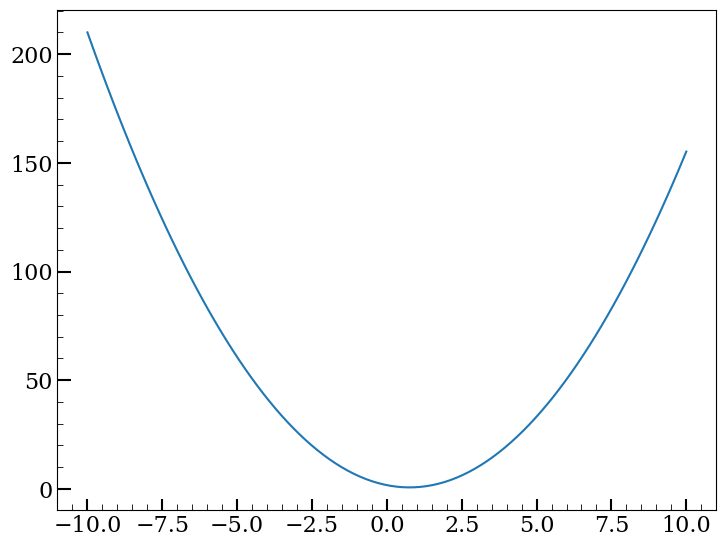

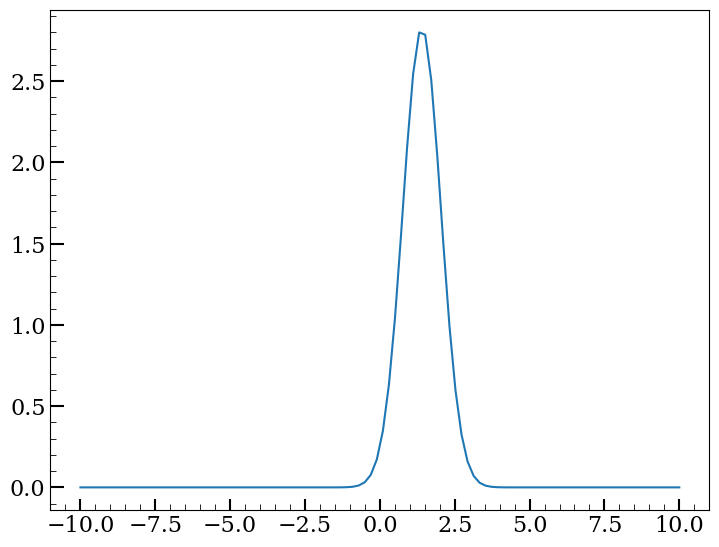

In [40]:
# Define test functions for symbolic regression

def gaussian_function(x, a, b, c):
    """
    Generate a Gaussian function: f(x) = a * exp(-(x - b)^2 / (2c^2))
    a: amplitude, b: mean (center), c: standard deviation
    """
    return a * np.exp(-((x - b) ** 2) / (2 * c ** 2))


def quadratic_function(x, a, b, c):
    """
    Generate a quadratic function: f(x) = ax^2 + bx + c
    a: quadratic coefficient, b: linear coefficient, c: constant term
    """
    return a * x**2 + b * x + c

def data_generator_quadratic():
    """
    Generate synthetic data for quadratic function regression.
    Returns:
        tuple: ((x_values, y_values), [a, b, c])
        - x_values: 100 points linearly spaced from -10 to 10
        - y_values: quadratic function values with random coefficients
        - [a, b, c]: the randomly generated coefficients
    """
    x = np.linspace(-10, 10, 100)  # Generate x values
    
    # Generate random coefficients between -5 and 5
    a, b, c = np.random.uniform(-5, 5, size=3)
    fun = quadratic_function(x, a, b, c)

    return (x, np.asarray(fun)), [a, b, c]


def data_generator_gaussian():
    """
    Generate synthetic data for Gaussian function regression.
    Returns:
        tuple: ((x_values, y_values), [a, b, c])
        - x_values: 100 points linearly spaced from -10 to 10
        - y_values: Gaussian function values with random parameters
        - [a, b, c]: the randomly generated parameters
    """
    x = np.linspace(-10, 10, 100)  # Generate x values

    # Generate random parameters (a > 0 for positive amplitude)
    a, b, c = np.random.uniform(0.1, 5, size=3)
    fun = gaussian_function(x, a, b, c)

    return (x, np.asarray(fun)), [a, b, c]


# Generate example data for both functions
x, default = data_generator_quadratic()
x_gaus, default_gaus = data_generator_gaussian()

# Plot the generated data to visualize the random functions
plt.plot(x[0], x[1])
plt.show()
plt.plot(x_gaus[0], x_gaus[1])
plt.show()

In [41]:
# Configure parameters for pyoperon symbolic regression

# Define default arguments for the symbolic regression
default_args = {
    # Mathematical operations allowed in the expressions
    'allowed_symbols': "pow,add,sub,mul,aq,constant,variable",
    
    # Convergence threshold for optimization
    'epsilon': 10**(-4),
    
    # Optimization objectives:
    # - r2: maximize R² score (accuracy)
    # - length: minimize expression length (simplicity)
    'objectives': ['r2', 'length'],
    
    # Maximum number of expression evaluations
    'max_evaluations': 100000000,
    
    # Maximum length of generated expressions
    'max_length': 100,
    
    # Maximum runtime in seconds
    'max_time': 60,
    
    # Number of parallel threads for computation
    'n_threads': 10,
    
    # Maximum number of generations for evolution
    'generations': int(1e12)
}

# Set up the quadratic regression problem
name = "Quadratic Function Problem"

# Generate training and test datasets
train, default_coeff_train = data_generator_quadratic()
test, default_coeff_test = data_generator_quadratic()

<Axes: title={'center': 'Quadratic Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

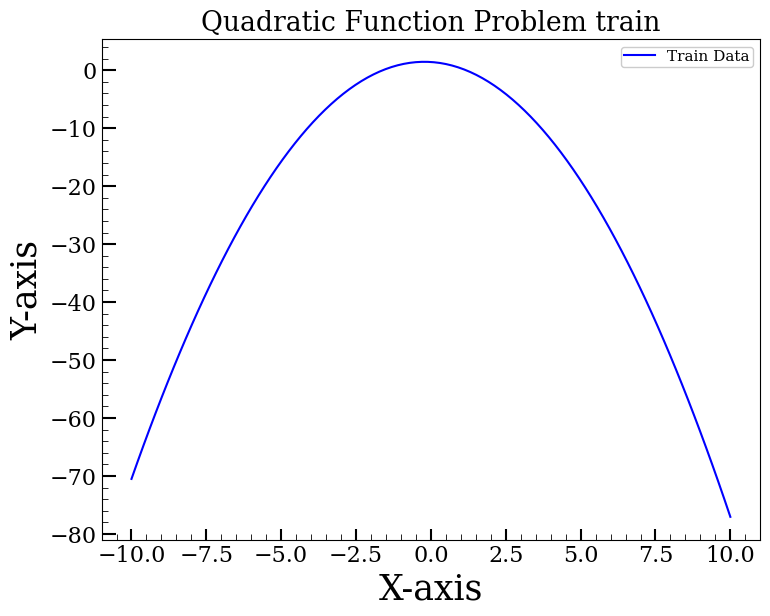

In [43]:
from BesselML import Problem
Problem_ = Problem(name, train, test, default_args)
Problem_.plot_data(train=True)

In [ ]:
Problem_.solve()

# Solving and Analyzing Results

The `solve()` method will:
1. Initialize a SymbolicRegressor with the configured parameters
2. Perform evolutionary optimization to find expressions
3. Generate a Pareto front of solutions balancing:
   - Accuracy (R² score)
   - Complexity (expression length)
4. Store all solutions found in the Problem instance

After solving, we can:
- Plot the results to compare predicted vs actual values
- Display the mathematical expressions in LaTeX format
- Analyze the residuals and errors
- View the trade-off between complexity and accuracy

<IPython.core.display.Math object>

(None,
 ('X_{1}^{2}·b_{2} + X_{1}·b_{1} + b_{0}',
  {'b0': 1.023712277412, 'b1': -2.011010305436481, 'b2': -4.132201656705347},
  X1**2*b2 + X1*b1 + b0))

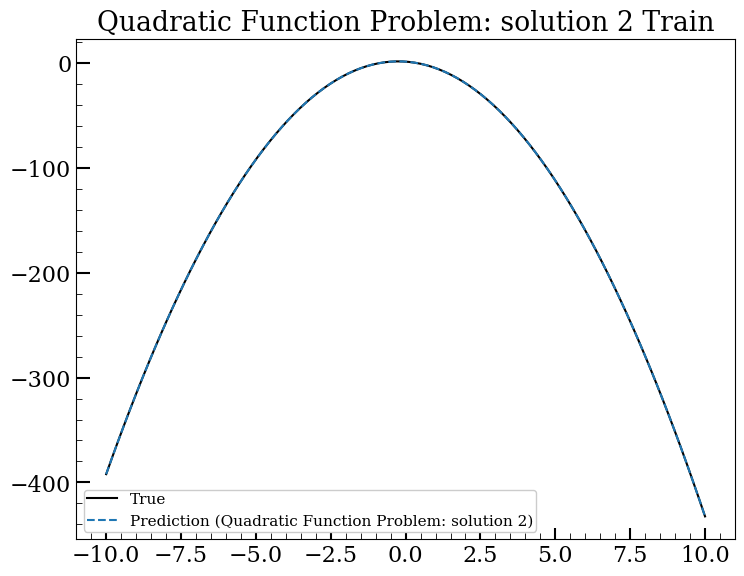

In [26]:
Problem_.solutions[-1].plot_results()
Problem_.solutions[-1].display_expression(), Problem_.solutions[2].extract_and_format()

<Axes: title={'center': 'Quadratic Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

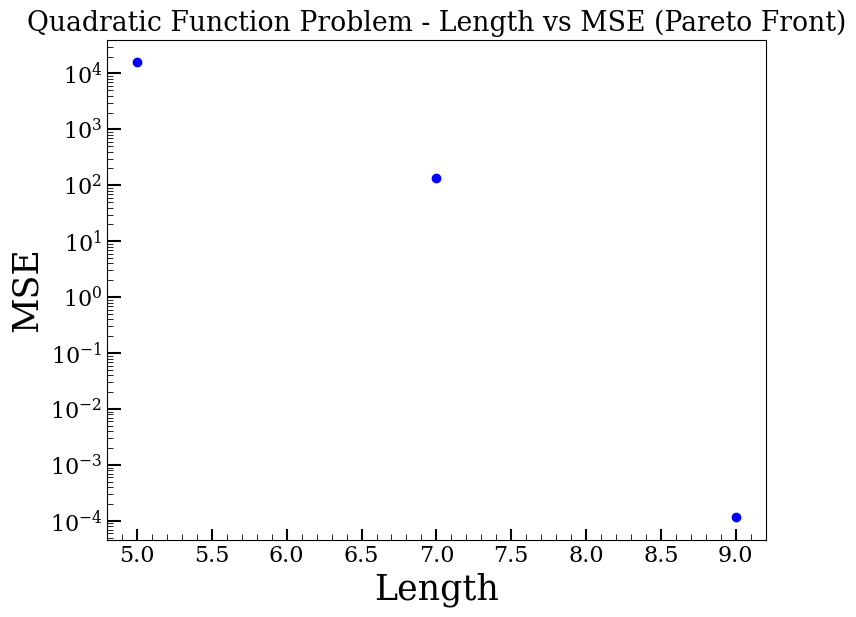

In [27]:
Problem_.plot_l_vs_mse()

------------- Gaussian example ------------

In [28]:
# Set up the Gaussian regression problem
name_g = "Gaussian Function Problem"

# Modified arguments for Gaussian function
gaussian_args = {
    # Add exponential function to allowed operations for Gaussian
    'allowed_symbols': "add,sub,mul,aq,constant,variable,exp",
    
    # Keep same optimization parameters as quadratic problem
    'epsilon': 10**(-4),
    'objectives': ['r2', 'length'],
    'max_evaluations': 100000000,
    'max_length': 100,
    'max_time': 60,
    'n_threads': 10,
    'generations': int(1e12)
}

# Generate training and test datasets for Gaussian problem
train_g, default_coeff_train_g = data_generator_gaussian()
test_g, default_coeff_test_g = data_generator_gaussian()

# Create Problem instance for Gaussian regression
Problem_g = Problem(name_g, train_g, test_g, gaussian_args)

<Axes: title={'center': 'Gaussian Function Problem train'}, xlabel='X-axis', ylabel='Y-axis'>

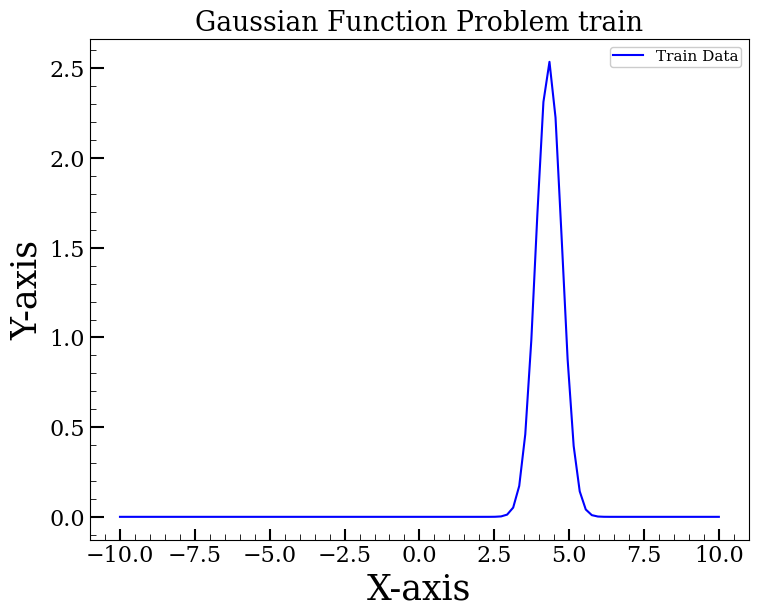

In [29]:
Problem_g.plot_data(train=True)

[-0.04467436298727989, 5.0], 110.64, (0.134795650840 + (0.016244117171 * (1.055613636971 * X1))), 0.21
[-0.05148056894540787, 6.0], 114.99, (0.351874589920 + ((-0.191520676017) * exp(((-0.086902856827) * X1)))), 0.21
[-0.09175488352775574, 7.0], 117.56, (0.134795650840 + (0.030535010621 * ((3.141592741013 * X1) / (sqrt(1 + ((-0.584461569786) * X1) ^ 2))))), 0.20
[-0.12616172432899475, 8.0], 123.16, (0.238547712564 + ((-0.010421949439) * (exp((0.444962263107 * X1)) - (3.958723545074 * X1)))), 0.20
[-0.9452003240585327, 9.0], 340282346638528859811704183484516925440.00, ((-0.022556090727) + (0.000000000000 * exp(((32.536609649658 * X1) / (sqrt(1 + exp((0.259333968163 * X1)) ^ 2)))))), 0.01
[-0.9964900016784668, 10.0], 128.46, ((-0.000850452867) + (0.000000000012 * exp(exp(((2.433224678040 * X1) / (sqrt(1 + exp((0.259333968163 * X1)) ^ 2))))))), 0.00
[-0.9987677931785583, 12.0], 138.61, ((-0.002252057660) + (0.000000008271 * exp(((5.047141551971 * X1) / (sqrt(1 + ((0.430791854858 * X1) * (

<Axes: title={'center': 'Gaussian Function Problem - Length vs MSE (Pareto Front)'}, xlabel='Length', ylabel='MSE'>

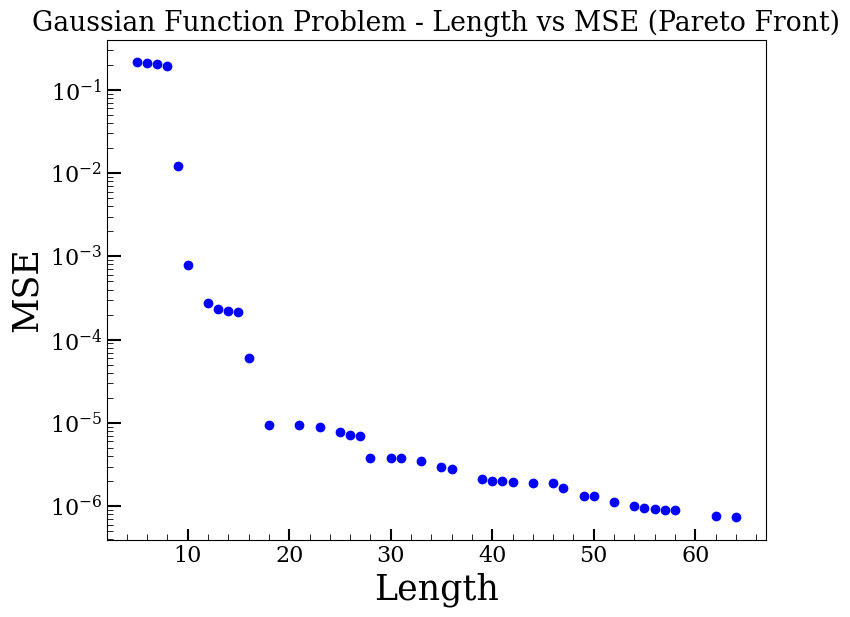

In [30]:
Problem_g.solve()
Problem_g.plot_l_vs_mse()

In [37]:
n=5
Problem_g.solutions[n].display_expression(), Problem_g.solutions[n].extract_and_format()
#Problem_g.solutions[n].plot_results()

<IPython.core.display.Math object>

(None,
 ('b_{0} + b_{1}·e^{e^{\\frac{X_{1}·b_{2}}{\\sqrt{e^{X_{1}·b_{3}} + 1}}}}',
  {'b0': -0.000850452867,
   'b1': 1.2e-11,
   'b2': 2.43322467804,
   'b3': 0.518667936326},
  b0 + b1*exp(exp(X1*b2/sqrt(exp(X1*b3) + 1)))))